HINTS:
* Data preprocessing
* Exploratory data analysis
* Model building
* Saving the model

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
import missingno as msno

#Dataset read


[Dataset 2015](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Kidney Disease/CKD DS-1 (2015)/chronic_kidney_disease_full_processed400.csv')
data = df
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


#Start-time

In [ ]:
import time
start_time = time.time()
end_time = time.time()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     491 non-null    float64
 1   bp      487 non-null    float64
 2   sg      450 non-null    float64
 3   al      451 non-null    float64
 4   su      448 non-null    float64
 5   rbc     342 non-null    object 
 6   pc      429 non-null    object 
 7   pcc     493 non-null    object 
 8   ba      493 non-null    object 
 9   bgr     452 non-null    float64
 10  bu      477 non-null    float64
 11  sc      480 non-null    float64
 12  sod     409 non-null    float64
 13  pot     408 non-null    float64
 14  hemo    443 non-null    float64
 15  pcv     426 non-null    float64
 16  wbcc    390 non-null    float64
 17  rbcc    365 non-null    float64
 18  htn     497 non-null    object 
 19  dm      497 non-null    object 
 20  cad     497 non-null    object 
 21  appet   499 non-null    object 
 22  pe

In [ ]:
data.shape

(500, 25)

#See our data statistically

In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
count,491.000000,487.000000,450.000000,451.000000,448.000000,452.000000,477.000000,480.000000,409.000000,408.000000,443.000000,426.000000,390.000000,365.000000,500.000000
mean,50.692464,75.071869,1.018500,0.798226,0.352679,139.289823,52.560168,2.622396,138.661369,4.551716,13.119413,40.622066,8215.641026,4.889589,0.500000
std,16.892853,13.097646,0.005596,1.268979,0.990194,72.834062,46.423080,5.205808,9.607665,2.810571,2.886720,8.752835,2724.757761,0.986141,0.500501
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,40.000000,70.000000,1.015000,0.000000,0.000000,99.000000,26.000000,0.800000,135.000000,3.800000,11.050000,34.250000,6400.000000,4.400000,0.000000
50%,53.000000,70.000000,1.020000,0.000000,0.000000,117.000000,40.000000,1.200000,139.000000,4.400000,13.600000,42.000000,7800.000000,4.900000,0.500000
75%,64.000000,80.000000,1.025000,1.000000,0.000000,140.000000,53.000000,2.200000,143.000000,4.900000,15.300000,48.000000,9600.000000,5.600000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


#The total count of null values that every feature holds

In [ ]:
df.isna().sum()

age        9
bp        13
sg        50
al        49
su        52
rbc      158
pc        71
pcc        7
ba         7
bgr       48
bu        23
sc        20
sod       91
pot       92
hemo      57
pcv       74
wbcc     110
rbcc     135
htn        3
dm         3
cad        3
appet      1
pe         1
ane        1
class      0
dtype: int64

#Correlation matrix & Matrix Visualisation

In [ ]:
df.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
age,1.000000,0.156209,-0.186125,0.130110,0.209882,0.249126,0.202402,0.136054,-0.091889,0.052098,-0.173870,-0.218167,0.114575,-0.259130,0.224843
bp,0.156209,1.000000,-0.254494,0.207670,0.241765,0.187834,0.217497,0.171129,-0.161643,0.075628,-0.330113,-0.350840,0.038605,-0.278303,0.343021
sg,-0.186125,-0.254494,1.000000,-0.523894,-0.331879,-0.418281,-0.349257,-0.398904,0.421583,-0.082291,0.629666,0.620248,-0.251466,0.574689,-0.759851
al,0.130110,0.207670,-0.523894,1.000000,0.311327,0.423279,0.480463,0.438312,-0.477540,0.136655,-0.662131,-0.638799,0.246551,-0.571527,0.677623
su,0.209882,0.241765,-0.331879,0.311327,1.000000,0.724428,0.197536,0.254542,-0.166922,0.223189,-0.269774,-0.280358,0.194171,-0.264350,0.386472
bgr,0.249126,0.187834,-0.418281,0.423279,0.724428,1.000000,0.184325,0.156534,-0.286564,0.077788,-0.358569,-0.352948,0.166983,-0.326824,0.466742
bu,0.202402,0.217497,-0.349257,0.480463,0.197536,0.184325,1.000000,0.596726,-0.348483,0.354537,-0.612215,-0.607908,0.066010,-0.571421,0.424901
sc,0.136054,0.171129,-0.398904,0.438312,0.254542,0.156534,0.596726,1.000000,-0.683694,0.325113,-0.423932,-0.423597,0.015815,-0.406526,0.341829
sod,-0.091889,-0.161643,0.421583,-0.477540,-0.166922,-0.286564,-0.348483,-0.683694,1.000000,0.080235,0.389277,0.392773,0.007923,0.347427,-0.414122
pot,0.052098,0.075628,-0.082291,0.136655,0.223189,0.077788,0.354537,0.325113,0.080235,1.000000,-0.133655,-0.165638,-0.088449,-0.158173,0.096889


#Find classes

In [ ]:
df['class'].value_counts()

1    250
0    250
Name: class, dtype: int64

In [ ]:
countNoDisease = len(df[df['class'] == 1])
countHaveDisease = len(df[df['class'] == 0])
print('class variables: NoD: ',countNoDisease,' HaveD: ',countHaveDisease)
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['class']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['class']))*100)))

class variables: NoD:  250  HaveD:  250
Percentage of Patients Haven't Heart Disease: 50.00%
Percentage of Patients Have Heart Disease: 50.00%


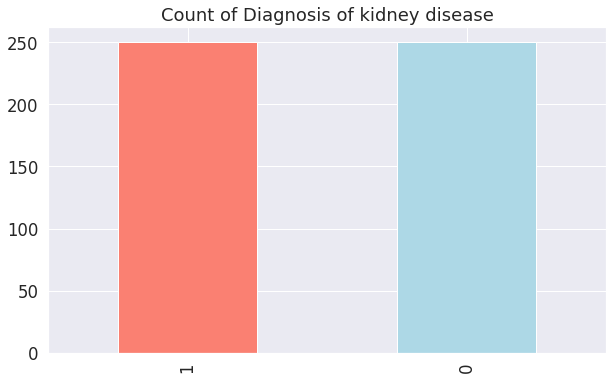

In [ ]:
df['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease")

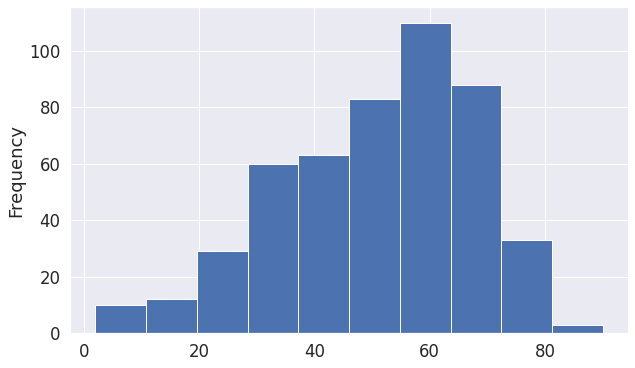

In [ ]:
df['age'].plot(kind='hist')

#Plotting to see null values
Here any features which have not touched the 400 mark at the top are having null values.

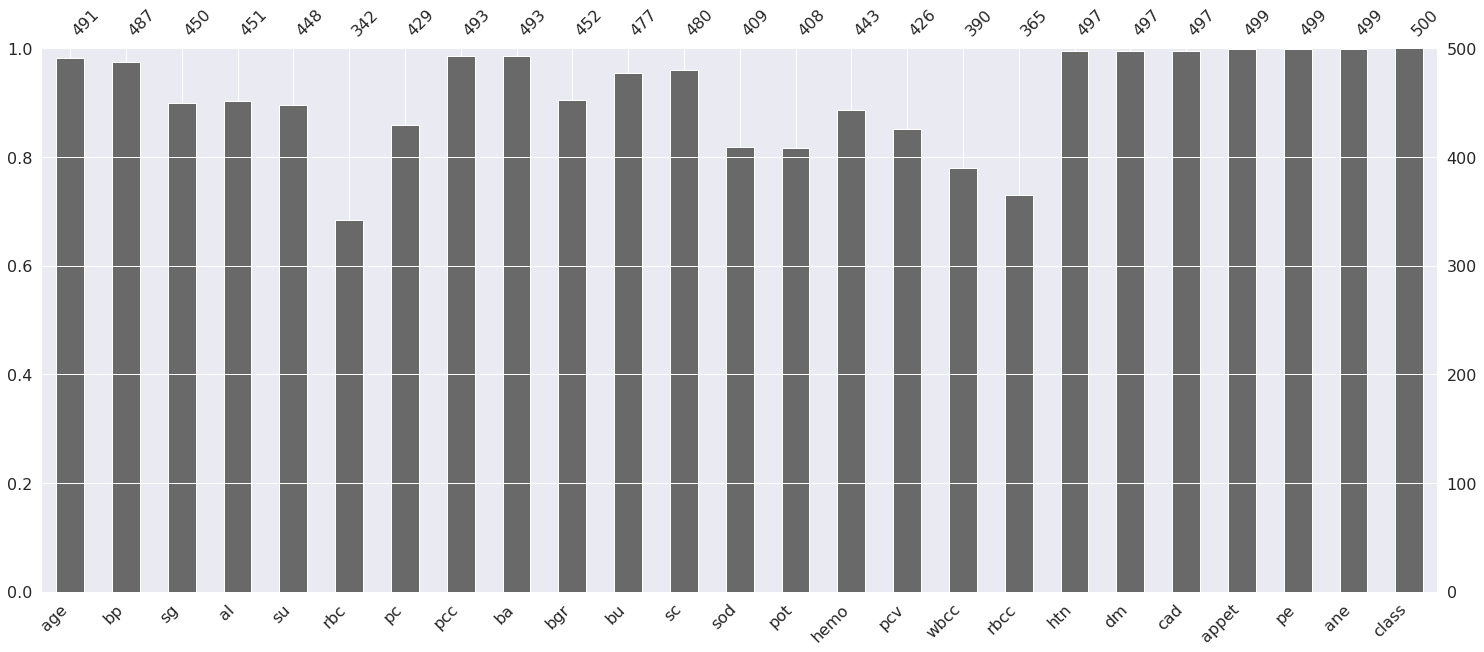

In [ ]:
p = msno.bar(data)

#Outliner
Here in the above graph we can see the distribution of blood pressure and also in the subplot it is visible that the bp column has some outliers in it.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


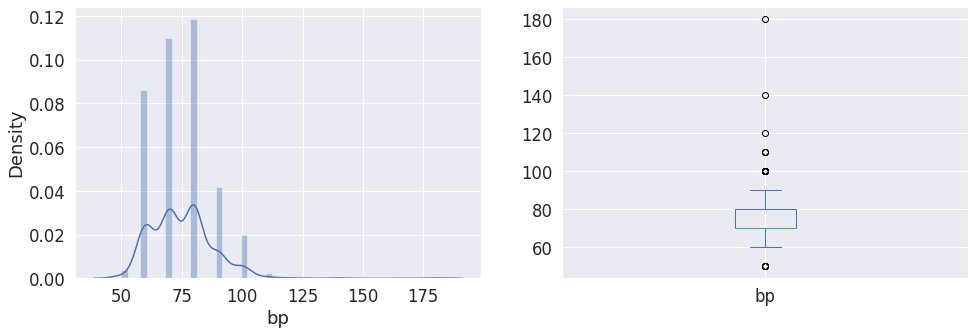

In [ ]:
plt.subplot(121), sns.distplot(data['bp'])
plt.subplot(122), data['bp'].plot.box(figsize=(16,5))
plt.show()

#Convert (DS) object to values

In [ ]:
#data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})
data['class'].value_counts()

1    250
0    250
Name: class, dtype: int64

#Calculate Correlation
Finding the Correlation between the plots

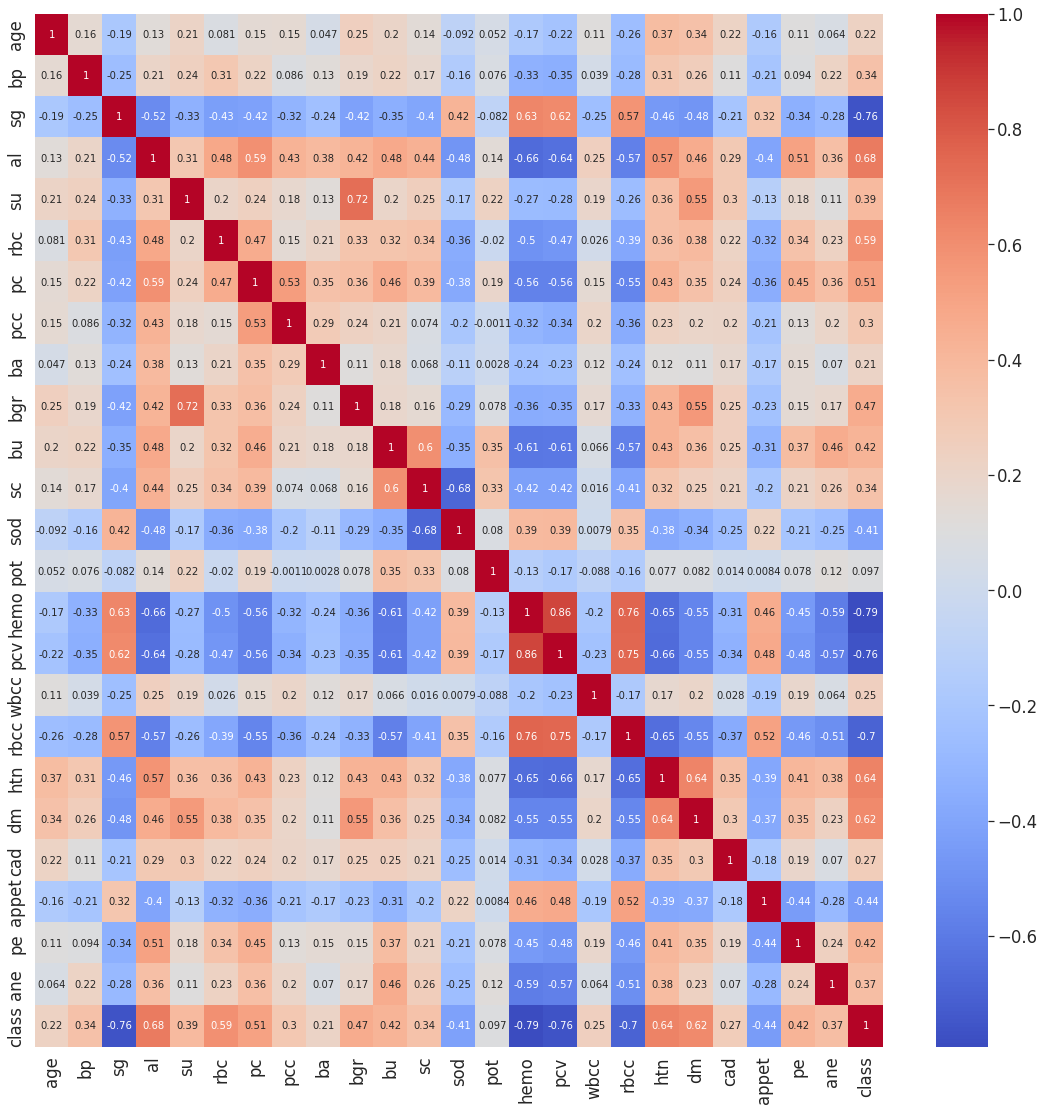

In [ ]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

#Exploratory data analysis (EDA)


In [ ]:
data.shape

(500, 25)

In [ ]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [ ]:
data.shape[0], data.dropna().shape[0] #we can see that there are 157 null values in the dataset.

(500, 234)

#Fill NaN with the avg value

In [ ]:
df = df.interpolate().bfill()
df = df.round(2)
print (df)
#df.to_csv('/content/drive/MyDrive/Data/Personal Collection DS/Kidney Disease/ckdDS not null.csv', index=False)

      age    bp    sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv    wbcc  \
0    48.0  80.0  1.02  1.0  0.0  0.0  0.0  0.0  0.0  121.0  ...  44.0  7800.0   
1     7.0  50.0  1.02  4.0  0.0  0.0  0.0  0.0  0.0  272.0  ...  38.0  6000.0   
2    62.0  80.0  1.01  2.0  3.0  0.0  0.0  0.0  0.0  423.0  ...  31.0  7500.0   
3    48.0  70.0  1.00  4.0  0.0  0.0  1.0  1.0  0.0  117.0  ...  32.0  6700.0   
4    51.0  80.0  1.01  2.0  0.0  0.0  0.0  0.0  0.0  106.0  ...  35.0  7300.0   
..    ...   ...   ...  ...  ...  ...  ...  ...  ...    ...  ...   ...     ...   
495  57.0  80.0  1.02  0.0  0.0  0.0  0.0  0.0  0.0  133.0  ...  46.0  6600.0   
496  43.0  60.0  1.02  0.0  0.0  0.0  0.0  0.0  0.0  117.0  ...  54.0  7400.0   
497  50.0  80.0  1.02  0.0  0.0  0.0  0.0  0.0  0.0  137.0  ...  45.0  9500.0   
498  55.0  80.0  1.02  0.0  0.0  0.0  0.0  0.0  0.0  140.0  ...  47.0  6700.0   
499  42.0  70.0  1.02  0.0  0.0  0.0  0.0  0.0  0.0   75.0  ...  54.0  7800.0   

     rbcc  htn   dm  cad  a

In [ ]:
data = df
data.shape[0], data.dropna().shape[0] #we can see that there are 157 null values in the dataset.

(500, 500)

In [ ]:
data.dropna()
data.shape

(500, 25)

In [ ]:
data["class"].value_counts()

1    250
0    250
Name: class, dtype: int64

#ML models

#Dataset flitering [data|class]

In [ ]:
X = data.iloc[:,:-1]
y = data['class']
print(X.shape)
print(type(X))

(500, 24)
<class 'pandas.core.frame.DataFrame'>


#Data plot

In [ ]:
import matplotlib.pyplot as plt

def _plot_data(new_data, data_label):
    print(new_data.shape)
    plt.figure(figsize=(8,6))
    plt.scatter(new_data[:,0],new_data[:,1],c=data_label[:]) #For visualization taken 2D only
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')

#Feature Selection
[source scikit](https://scikit-learn.org/stable/modules/feature_selection.html)
[source kaggle](https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook)
[All FS kaggle](https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection)
[source Analytic Vidya](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)


In [ ]:
!pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


[ 9 21  8  6 20  5  4 18 17 14  2 11 13  1 19  0 12 22 16  3  7 23 15 10]
Fish rank Values sorted: [23 22 21 20 19 18 17 16 15]
Fish rank Indices: [21 17  1  4 14  7  8 18 22]
Fish score:  (500, 9)


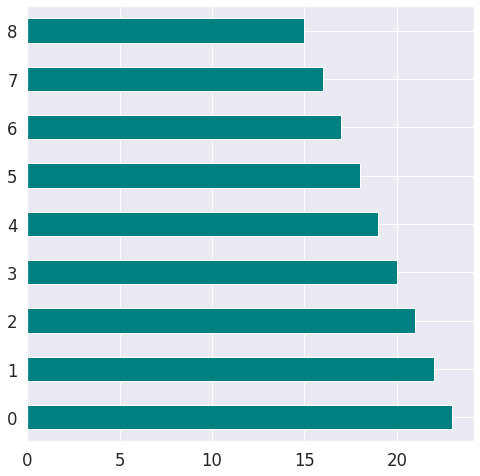

In [ ]:
#Remove features with low varience
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
"""

logistic = LogisticRegression(C = 1, penalty = "l1", solver = 'liblinear', random_state=7).fit(X,y)
model = SelectFromModel(logistic, prefit=True)
X_new = model.transform(X)
print("L1 selection: ", X_new.shape)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
dataset_rm_low_var = sel.fit_transform(X)
print("Variance Thresh: ", dataset_rm_low_var.shape)

#L1- based Feature Selection
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_L1 = model.transform(X)
print("LinearSVC: ", X_L1.shape)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
X_fclass = SelectKBest(f_classif, k=11).fit_transform(X, y) #K feature with high chi will be selected #Input must be [non negative]
print("F_Classif: ", X_fclass.shape)

X_mic = SelectKBest(mutual_info_classif).fit_transform(X, y)
print("Mutual_info_classif: ", X_mic.shape)

from sklearn.ensemble import ExtraTreesClassifier
clf_fs = ExtraTreesClassifier(n_estimators=50)
clf_fs = clf_fs.fit(X, y)
clf_fs.feature_importances_  
model = SelectFromModel(clf_fs, prefit=True)
X_treeFS = model.transform(X)
X_treeFS.shape  
print("Tree based FS: ", X_treeFS.shape)   


from sklearn.svm import SVC
from sklearn.feature_selection import RFE
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_
print("RFE rank: ",ranking)

num_feat = 11
indic_rfe = np.argsort(ranking)[::-1][:num_feat]
print("RFE rank Indices:",indic_rfe)
# Getting N maximum values
print("RFE rank Values sorted:",ranking[indic_rfe])

X_rfe_form = np.asarray(X)  
X_rfe = X_rfe_form[:, indic_rfe[:]] 
print("RFE: ",X_rfe.shape)

dataframe1 = pd.DataFrame(X)
feat_imp1 = pd.Series(ranking, dataframe1.columns[0:len(dataframe1.columns)])
feat_imp1.plot(kind="barh", color="teal")
plt.show()

dataframe2 = pd.DataFrame(X_rfe)
feat_imp2 = pd.Series(ranking[indic_rfe], dataframe2.columns[0:len(dataframe2.columns)])
feat_imp2.plot(kind="barh", color="teal")
plt.show()
"""
# # Plot pixel ranking
# plt.matshow(ranking, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.title("Ranking of pixels with RFE")
# plt.show()

from skfeature.function.similarity_based import fisher_score
import pandas as pd

idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank') #returns rank directly instead of fisher score. so no need for feature_ranking
print(idx)
num_feat = 9
indices_fish = np.argsort(idx)[::-1][:num_feat]
# Getting N maximum values
print("Fish rank Values sorted:",idx[indices_fish])
print("Fish rank Indices:",indices_fish)

X_fish_form = np.asarray(X)  
X_fish = X_fish_form[:, indices_fish[:]] 
print("Fish score: ",X_fish.shape)
dataframe2 = pd.DataFrame(X_fish)
feat_imp2 = pd.Series(idx[indices_fish], dataframe2.columns[0:len(dataframe2.columns)])
feat_imp2.plot(kind="barh", color="teal")
plt.show()

#Outlier detection
[Github](https://github.com/codebasics/py/blob/master/ML/FeatureEngineering/2_outliers_z_score/2_outliers_z_score.ipynb)
[Box plot](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)
[Box plot-2](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/)
[Remove outliers](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)

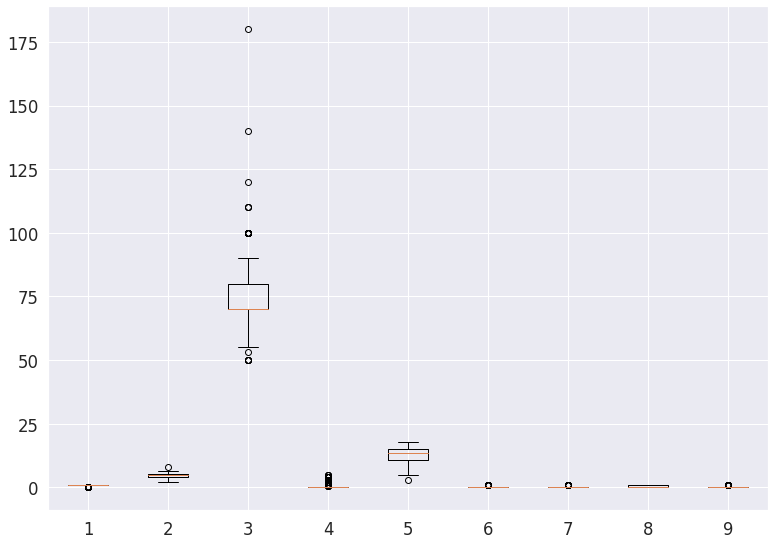

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X_fish)
plt.show()

In [ ]:
"""import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
#%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
df = pd.read_csv("/content/drive/MyDrive/Data/Kidney Disease/Garbage data/weight-height.csv")
df.sample(5)
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))"""

'import pandas as pd\nimport matplotlib\nfrom matplotlib import pyplot as plt\n#%matplotlib inline\nmatplotlib.rcParams[\'figure.figsize\'] = (10,6)\ndf = pd.read_csv("/content/drive/MyDrive/Data/Kidney Disease/Garbage data/weight-height.csv")\ndf.sample(5)\nfrom scipy.stats import norm\nimport numpy as np\nplt.hist(df.Height, bins=20, rwidth=0.8, density=True)\nplt.xlabel(\'Height (inches)\')\nplt.ylabel(\'Count\')\n\nrng = np.arange(df.Height.min(), df.Height.max(), 0.1)\nplt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))'

In [ ]:
X = X_fish #dataset_rm_low_var #X_new #X_L1  #dataset_k_best #dataset_rm_low_var

#Dimension Reduction (PCA|SVD)

#PCA

(500, 2)


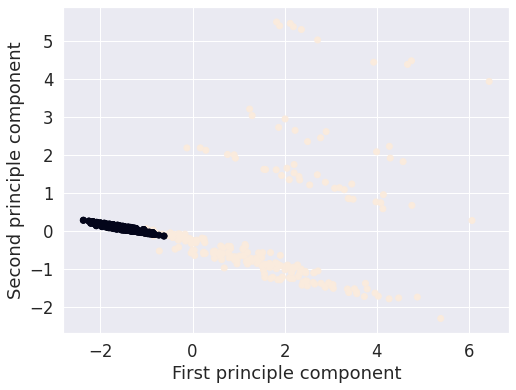

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X) #making input arrays -> Tranpose 

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #Here code suggests 3|10 is the best 5 classifiers shows 100% accuracy
pca.fit(scaled_data)
X_pca=pca.transform(scaled_data) #making input arrays -> reverse Tranpose = original
_plot_data(X_pca, y)

#PCA box plot

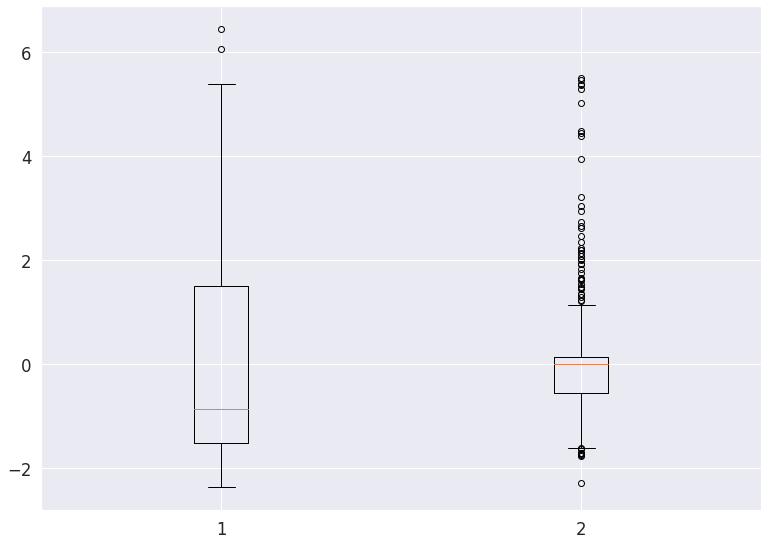

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X_pca)
plt.show()

#SVD

(500, 9)
<class 'numpy.int64'>
(500, 2)


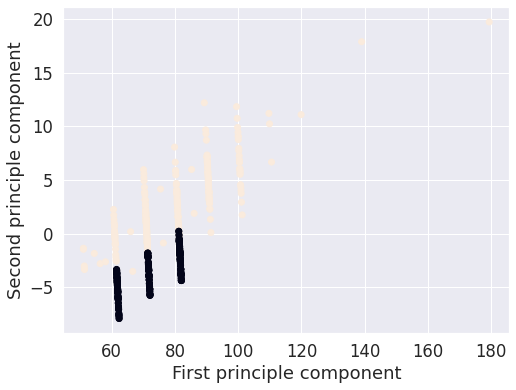

In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(X)
X_svd = svd.transform(X)
print(X.shape)
print(type(y[0]))
_plot_data(X_svd,y)

#SVD box plot

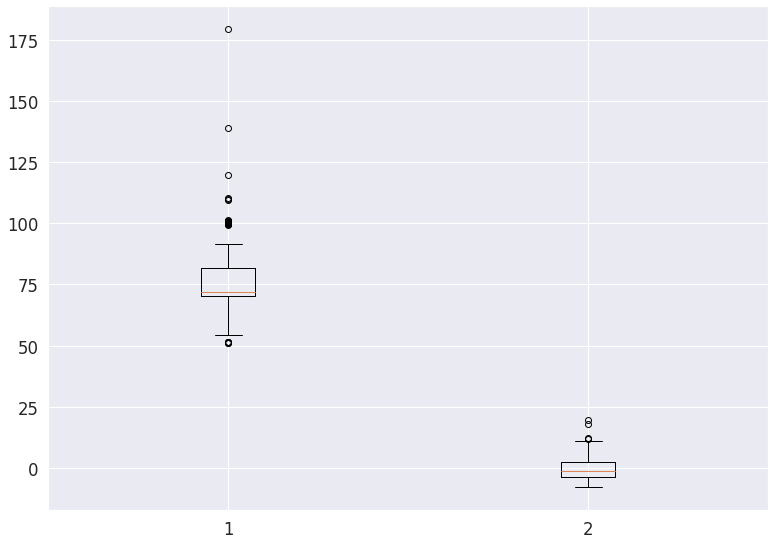

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X_svd)
plt.show()

#Data set Rebuilding using PCA|SVD

In [ ]:
X = X_pca

#Dataset Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, shuffle = True, random_state=2)

#ML-Logestic Regrasion

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
res = logreg.score(X_train,y_train)
print(res*100,'%')

96.57142857142857 %


In [ ]:
res = logreg.score(X_test,y_test)
print(res*100,'%')

97.33333333333334 %


#End time

In [ ]:
runtime = end_time - start_time
print("Total program run time: ", runtime)

Total program run time:  2.288818359375e-05


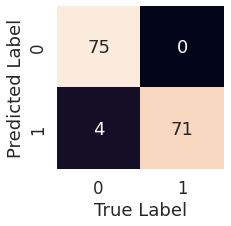

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    This function will be heloing in plotting the confusion matrix by using seaborn
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

#print('Train Accuracy: ', accuracy_score(X_train, y_train))
#print('Test Accuracy: ', accuracy_score(X_test, y_test))

#Logistic Regression-2

LG Train Accuracy: 96.57%
LG Test Accuracy: 97.33%


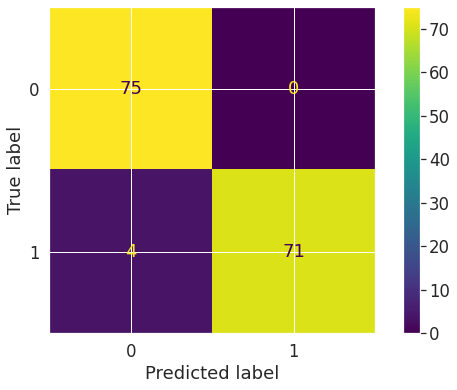

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Accuracy = logreg.score(X_test, y_test)
print(f'LG Train Accuracy: {round(logreg.score(X_train,y_train)*100,2)}%')
print(f'LG Test Accuracy: {round(Accuracy*100,2)}%')

predictions = logreg.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(logreg.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_LR = []
result_LR.append("LR")
result_LR.append(sensitivity)
result_LR.append(specificity)
result_LR.append(PPV)
result_LR.append(NPV)
result_LR.append(F1)
result_LR.append(Train_accuracy)
result_LR.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_LR)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['LR', 0.95, 1.0, 1.0, 0.95, 0.97, 96.57, 97.33]


#Naive Bayes

NB Train Accuracy: 93.43%
NB Accuracy: 94.0%


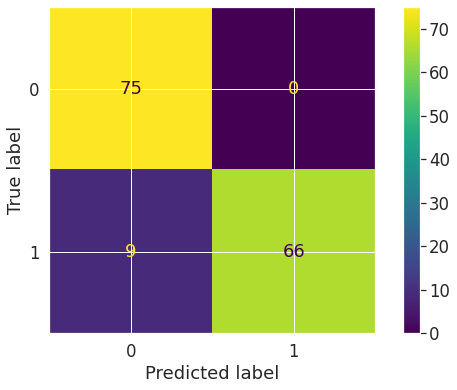

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 
NB = p
NB.fit(X_train, y_train)
Accuracy = NB.score(X_test, y_test)
Train_accuracy = round(NB.score(X_train,y_train)*100,2)
print(f'NB Train Accuracy: {Train_accuracy}%')
print(f'NB Accuracy: {round(Accuracy*100,2)}%')

predictions = NB.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(NB.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_NB = []
result_NB.append("NB")
result_NB.append(sensitivity)
result_NB.append(specificity)
result_NB.append(PPV)
result_NB.append(NPV)
result_NB.append(F1)
result_NB.append(Train_accuracy)
result_NB.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_NB)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['NB', 0.88, 1.0, 1.0, 0.89, 0.94, 93.43, 94.0]


#Decision Tree

DT Train Accuracy: 100.0%
DT Accuracy: 98.0%


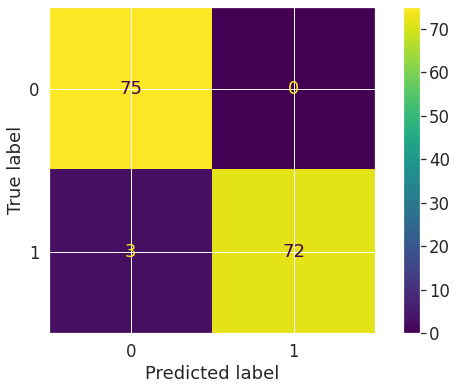

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DTc = DecisionTreeClassifier()
DTc.fit(X_train, y_train)
Accuracy = DTc.score(X_test, y_test)

print(f'DT Train Accuracy: {round(DTc.score(X_train,y_train)*100,2)}%')
print(f'DT Accuracy: {round(Accuracy*100,2)}%')

predictions = DTc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=DTc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTc.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(DTc.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_DT = []
result_DT.append("DT")
result_DT.append(sensitivity)
result_DT.append(specificity)
result_DT.append(PPV)
result_DT.append(NPV)
result_DT.append(F1)
result_DT.append(Train_accuracy)
result_DT.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_DT)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['DT', 0.96, 1.0, 1.0, 0.96, 0.98, 100.0, 98.0]


#Random Forest

RF Train Accuracy: 99.71%
Random Forest Accuracy: 98.0%


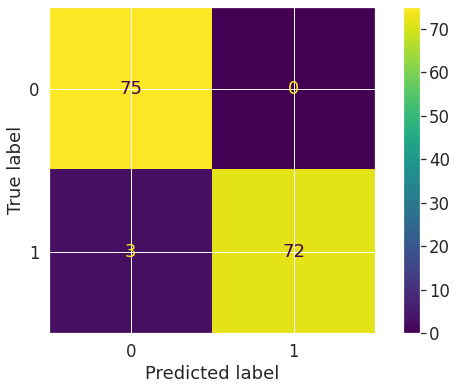

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rf = RandomForestClassifier(criterion= 'gini', max_depth=10, max_leaf_nodes=10, random_state=15, verbose= 0)
clf_rf.fit(X_train, y_train)
Accuracy = clf_rf.score(X_test, y_test)

print(f'RF Train Accuracy: {round(clf_rf.score(X_train,y_train)*100,2)}%')
print(f'Random Forest Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_rf.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_RF = []
result_RF.append("RF")
result_RF.append(sensitivity)
result_RF.append(specificity)
result_RF.append(PPV)
result_RF.append(NPV)
result_RF.append(F1)
result_RF.append(Train_accuracy)
result_RF.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_RF)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['RF', 0.96, 1.0, 1.0, 0.96, 0.98, 99.71, 98.0]


#Passive Aggresive Classifier

PAC Train Accuracy: 96.0%
PAC Accuracy: 96.67%


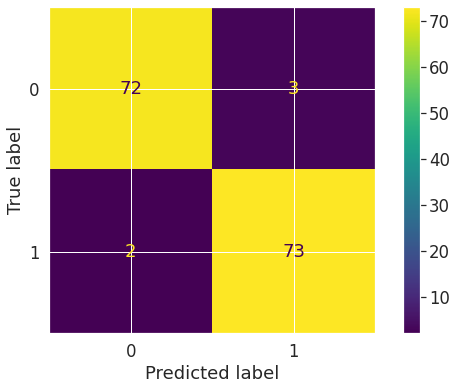

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'PAC Train Accuracy: {round(pac.score(X_train,y_train)*100,2)}%')
print(f'PAC Accuracy: {round(Accuracy*100,2)}%')

predictions = pac.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=pac.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pac.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(pac.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_PAC = []
result_PAC.append("PAC")
result_PAC.append(sensitivity)
result_PAC.append(specificity)
result_PAC.append(PPV)
result_PAC.append(NPV)
result_PAC.append(F1)
result_PAC.append(Train_accuracy)
result_PAC.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_PAC)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['PAC', 0.97, 0.96, 0.96, 0.97, 0.96, 96.0, 96.67]


#SVM

SVM Train Accuracy: 97.14%
SVM Accuracy: 97.33%


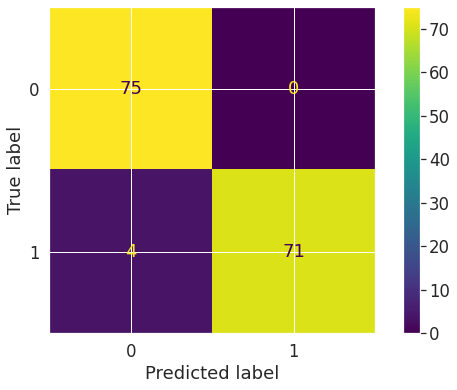

In [ ]:
#cross validation test [svm]
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf', C=1)
clf_svm.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_svm.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'SVM Train Accuracy: {round(clf_svm.score(X_train,y_train)*100,2)}%')
print(f'SVM Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_svm.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_svm.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_svm.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_SVM = []
result_SVM.append("SVM")
result_SVM.append(sensitivity)
result_SVM.append(specificity)
result_SVM.append(PPV)
result_SVM.append(NPV)
result_SVM.append(F1)
result_SVM.append(Train_accuracy)
result_SVM.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_SVM)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['SVM', 0.95, 1.0, 1.0, 0.95, 0.97, 97.14, 97.33]


#KNN

KNN Train Accuracy: 97.14%
KNN Accuracy: 98.0%


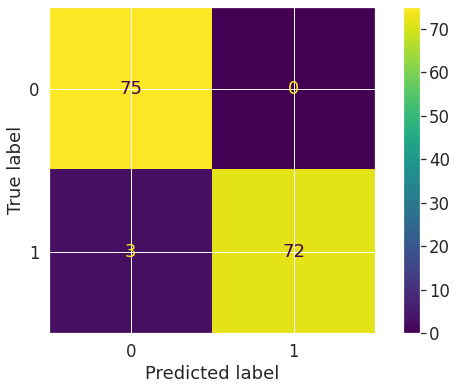

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=7)

clf_knn.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_knn.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'KNN Train Accuracy: {round(clf_knn.score(X_train,y_train)*100,2)}%')
print(f'KNN Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_knn.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_knn.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
print(Accuracy)
result_KNN = []
result_KNN.append("KNN")
result_KNN.append(sensitivity)
result_KNN.append(specificity)
result_KNN.append(PPV)
result_KNN.append(NPV)
result_KNN.append(F1)
result_KNN.append(Train_accuracy)
result_KNN.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_KNN)

98.0
sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['KNN', 0.96, 1.0, 1.0, 0.96, 0.98, 97.14, 98.0]


#Stochastic Gradient Discent

SGD Train Accuracy: 97.43%
SGD Accuracy: 98.67%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


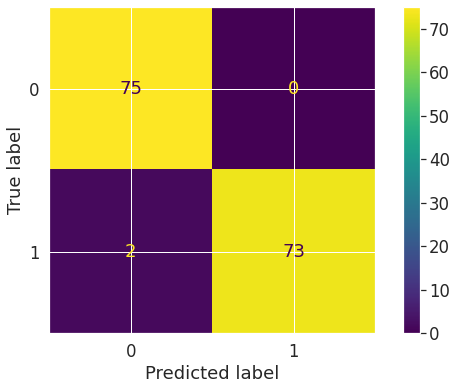

In [ ]:
#Stochastic Gradient Discent
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l1", max_iter=5)

clf_sgd.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_sgd.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'SGD Train Accuracy: {round(clf_sgd.score(X_train,y_train)*100,2)}%')
print(f'SGD Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_sgd.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_sgd.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_sgd.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_SGD = []
result_SGD.append("SGD")
result_SGD.append(sensitivity)
result_SGD.append(specificity)
result_SGD.append(PPV)
result_SGD.append(NPV)
result_SGD.append(F1)
result_SGD.append(Train_accuracy)
result_SGD.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_SGD)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['SGD', 0.97, 1.0, 1.0, 0.97, 0.98, 97.43, 98.67]


#Gradient Boosting

GB Train Accuracy: 99.14%
GB Accuracy: 98.0%


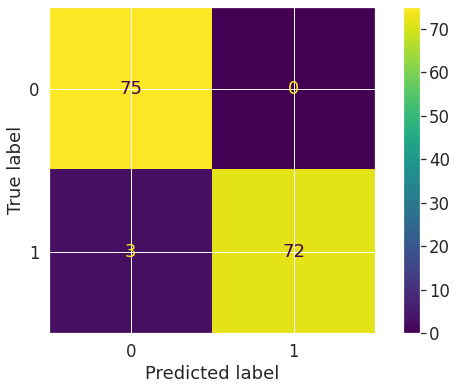

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(learning_rate=0.01,random_state=0)


clf_gb.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_gb.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'GB Train Accuracy: {round(clf_gb.score(X_train,y_train)*100,2)}%')
print(f'GB Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_gb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gb.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_gb.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_GB = []
result_GB.append("GB")
result_GB.append(sensitivity)
result_GB.append(specificity)
result_GB.append(PPV)
result_GB.append(NPV)
result_GB.append(F1)
result_GB.append(Train_accuracy)
result_GB.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_GB)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['GB', 0.96, 1.0, 1.0, 0.96, 0.98, 99.14, 98.0]


#ADA Boost

GB Train Accuracy: 100.0%
GB Accuracy: 98.0%


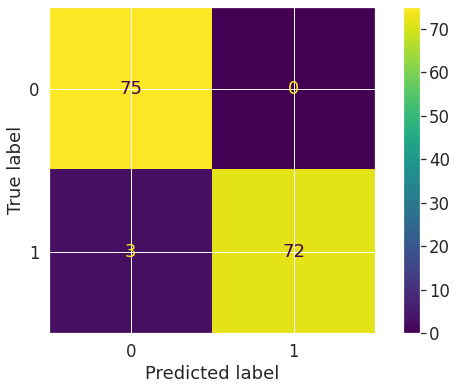

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf_adaB = AdaBoostClassifier(n_estimators=200, random_state=0)
clf_adaB.fit(X_train,y_train)
AdaBoostClassifier(n_estimators=200, random_state=0) #At which boosting is terminated
y_pred = clf_adaB.predict(X_test)
#clf_adaB.score(X, y)
Accuracy=accuracy_score(y_test,y_pred)
print(f'GB Train Accuracy: {round(clf_adaB.score(X_train,y_train)*100,2)}%')
print(f'GB Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_adaB.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_adaB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_adaB.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_adaB.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_ADAB = []
result_ADAB.append("ADAB")
result_ADAB.append(sensitivity)
result_ADAB.append(specificity)
result_ADAB.append(PPV)
result_ADAB.append(NPV)
result_ADAB.append(F1)
result_ADAB.append(Train_accuracy)
result_ADAB.append(Accuracy)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_ADAB)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['ADAB', 0.96, 1.0, 1.0, 0.96, 0.98, 100.0, 98.0]


#XGBoost
[Help](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/)

In [ ]:
#!pip install xgboost==1.0.1

XBoost Train Accuracy: 99.14%
XBoost Accuracy: 98.0%


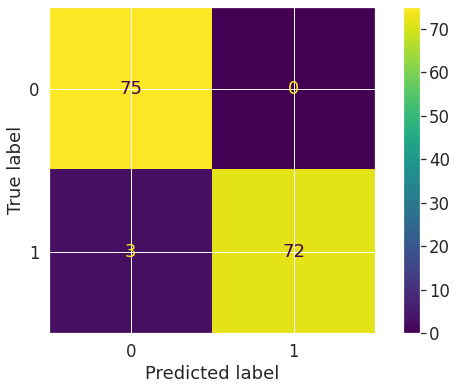

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

clf_xboost = XGBClassifier()
# evaluate the model
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(clf_xboost, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
clf_xboost.fit(X_train, y_train)
y_pred = clf_xboost.predict(X_test)
# report performance
Accuracy = accuracy_score(y_test,y_pred)
print(f'XBoost Train Accuracy: {round(clf_xboost.score(X_train,y_train)*100,2)}%')
print(f'XBoost Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_xboost.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_xboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_xboost.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_xboost.score(X_train,y_train)*100,2)
Accuracy_XBOOST = round(Accuracy*100,2)
result_XBOOST = []
result_XBOOST.append("XBOOST")
result_XBOOST.append(sensitivity)
result_XBOOST.append(specificity)
result_XBOOST.append(PPV)
result_XBOOST.append(NPV)
result_XBOOST.append(F1)
result_XBOOST.append(Train_accuracy)
result_XBOOST.append(Accuracy_XBOOST)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_XBOOST)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['XBOOST', 0.96, 1.0, 1.0, 0.96, 0.98, 99.14, 98.0]


#MLP

MLP Train Accuracy: 99.43%
MLP Accuracy: 98.0%


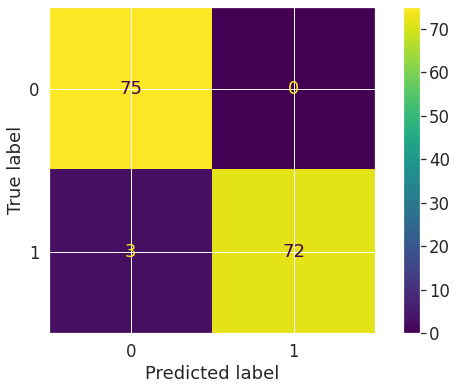

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(352,12), random_state=1)
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)

Accuracy=accuracy_score(y_test,y_pred)
print(f'MLP Train Accuracy: {round(clf_mlp.score(X_train,y_train)*100,2)}%')
print(f'MLP Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_mlp.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_mlp.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_mlp.score(X_train,y_train)*100,2)
Accuracy_MLP = round(Accuracy*100,2)
result_MLP = []
result_MLP.append("MLP")
result_MLP.append(sensitivity)
result_MLP.append(specificity)
result_MLP.append(PPV)
result_MLP.append(NPV)
result_MLP.append(F1)
result_MLP.append(Train_accuracy)
result_MLP.append(Accuracy_MLP)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_MLP)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['MLP', 0.96, 1.0, 1.0, 0.96, 0.98, 99.43, 98.0]


#ELM classifier
[Kaggele Example](https://www.kaggle.com/code/robertbm/extreme-learning-machine-example/notebook)
[Official docs](https://elm.readthedocs.io/en/latest/usage.html)
[Manual Code](https://medium.datadriveninvestor.com/extreme-learning-machine-for-simple-classification-e776ad797a3c)

In [ ]:
# -*- coding: utf-8 -*-
__author__ = 'fabiansyahcahyo'

import numpy as np

class ELM(object):  
    
    def __init__(self, inputSize, outputSize, hiddenSize):
        """
        Initialize weight and bias between input layer and hidden layer
        Parameters:
        inputSize: int
            The number of input layer dimensions or features in the training data
        outputSize: int
            The number of output layer dimensions
        hiddenSize: int
            The number of hidden layer dimensions        
        """    

        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize       
        
        # Initialize random weight with range [-0.5, 0.5]
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))

        # Initialize random bias with range [0, 1]
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        """
        Sigmoid activation function
        
        Parameters:
        x: array-like or matrix
            The value that the activation output will look for
        Returns:      
            The results of activation using sigmoid function
        """
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        """
        Predict the results of the training process using test data
        Parameters:
        X: array-like or matrix
            Test data that will be used to determine output using ELM
        Returns:
            Predicted results or outputs from test data
        """
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta

        return y

    def train(self, X, y):
        """
        Extreme Learning Machine training process
        Parameters:
        X: array-like or matrix
            Training data that contains the value of each feature
        y: array-like or matrix
            Training data that contains the value of the target (class)
        Returns:
            The results of the training process   
        """

        X = np.matrix(X)
        y = np.matrix(y)        
        
        # Calculate hidden layer output matrix (Hinit)
        self.H = (X * self.weight.T) + self.bias

        # Sigmoid activation function
        self.H = self.sigmoid(self.H)

        # Calculate the Moore-Penrose pseudoinverse matriks        
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T

        # Calculate the output weight matrix beta
        self.beta = H_moore_penrose * y

        return self.H * self.beta

In [ ]:
print(X_train.shape, y_train.shape)
X_train2, X_test2, y_train2, y_test2 = np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test) 
print(y_train2.reshape(-1,1)[0:5])

(350, 2) (350,)
[[0]
 [1]
 [0]
 [0]
 [0]]


[(1) Fix linalg-singular matrix ](https://www.statology.org/python-numpy-linalg-singular-matrix/)

[(2) Fix linalg-singular matrix](https://stats.stackexchange.com/questions/463324/logistic-regression-failed-in-statsmodel-but-works-in-sklearn-breast-cancer-dat)

<class 'numpy.int64'>
<class 'numpy.int64'>


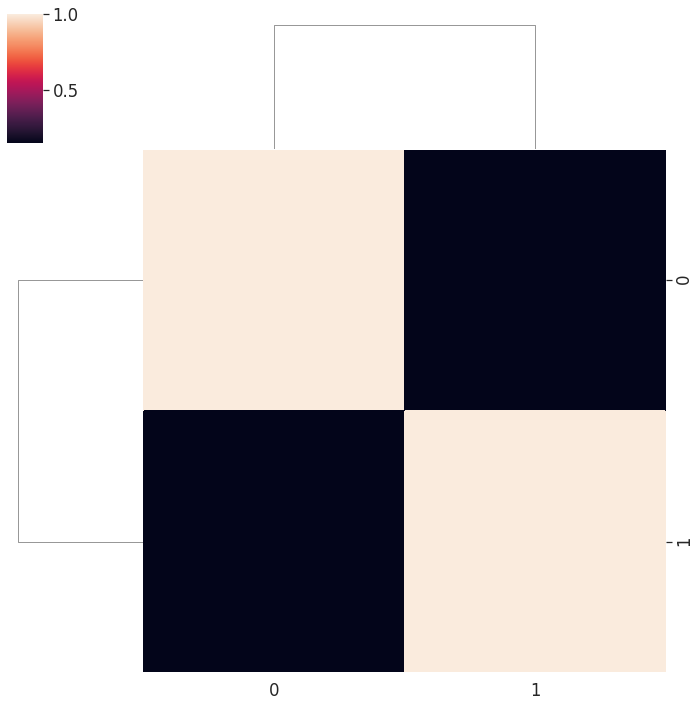

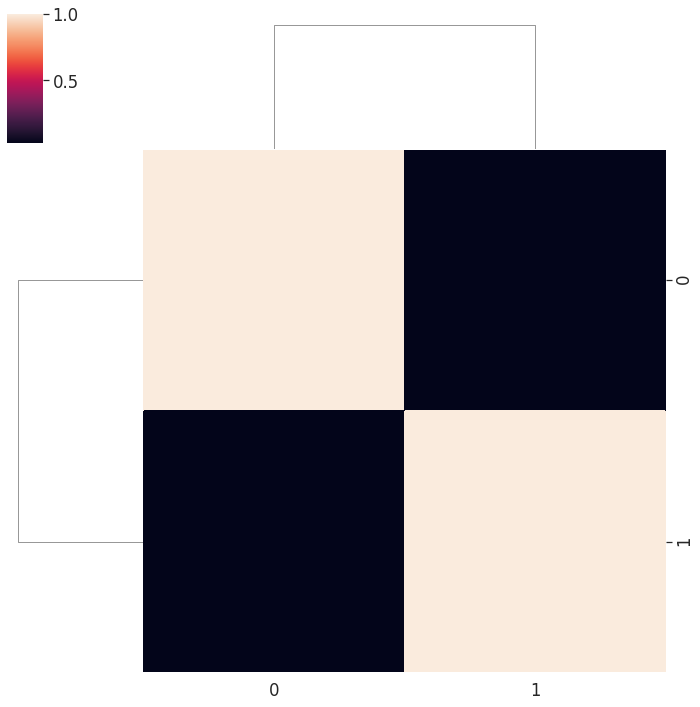

In [ ]:
####
y_train2 = y_train2.astype(int)
y_test2 = y_test2.astype(int)
print(type(y_train2[0]))
print(type(y_test2[0]))
#for with out PCA
X_train2 = X_train2.astype(int)
X_test2 = X_test2.astype(int)
import random
X_train2 = X_train2 + random.uniform(0.001, 0.009)
####

df_train = pd.DataFrame(X_train2)
df_test = pd.DataFrame(X_test2)
import seaborn as sns
sns.clustermap(df_train.corr())
sns.clustermap(df_test.corr())

In [ ]:
# Comment this if PCA used
"""excl = [11,9,8]
X_train_drop_corr = scaler.fit_transform(df_train.drop(excl,axis=1))
X_test_drop_corr = scaler.fit_transform(df_test.drop(excl,axis=1))
df = pd.DataFrame(X_train_drop_corr)
df2 = pd.DataFrame(X_test_drop_corr)
sns.clustermap(df.corr())
sns.clustermap(df2.corr())"""

'excl = [11,9,8]\nX_train_drop_corr = scaler.fit_transform(df_train.drop(excl,axis=1))\nX_test_drop_corr = scaler.fit_transform(df_test.drop(excl,axis=1))\ndf = pd.DataFrame(X_train_drop_corr)\ndf2 = pd.DataFrame(X_test_drop_corr)\nsns.clustermap(df.corr())\nsns.clustermap(df2.corr())'

In [ ]:
print(X_train2.shape) #change to <X_train_drop_corr> if f| PCA not used
print(X_test2.shape) #change to <X_test_drop_corr> if f| PCA not used

(350, 2)
(150, 2)


8,9,11 are highly correlated. So if we include all of them into the fit, it is going to be hard to estimate these coefficients. We can remove these first, and fit:

In [ ]:
# Create instance of ELM object with 10 hidden neuron
#input | output | Hidden layer (2, 1, 30)
elm = ELM(X_train.shape[1], 1, 30) #change to <X_train_drop_corr> if f| PCA not used

# Train data
elm.train(X_train,y_train2.reshape(-1,1)) #change to <X_train_drop_corr> if f| PCA not used

# Make prediction from training process
y_pred_train = elm.predict(X_train) #change to <X_train_drop_corr> if f| PCA not used
y_pred_train = (y_pred_train > 0.5).astype(int)
Train_accuracy = round(accuracy_score(y_train2, y_pred_train),2)
print('Train accuracy: ', Train_accuracy*100, "%")

Train accuracy:  97.0 %


ELM test Accuracy: 96.67%


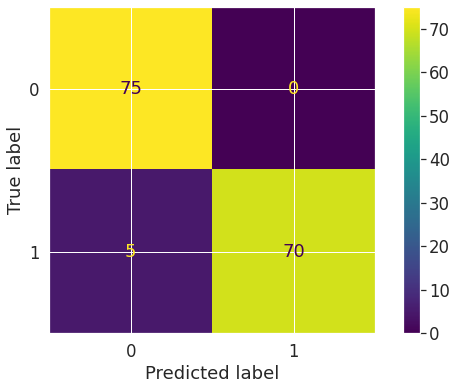

In [ ]:
# Make prediction from testing process
y_pred2 = elm.predict(X_test) #change to <X_test_drop_corr> if f| PCA not used
y_pred2 = (y_pred2 > 0.5).astype(int)

Accuracy = accuracy_score(y_test2, y_pred2)
#print(f'ELM Train Accuracy: {round(accuracy_score(X_train,y_train)*100,2)}%')
print(f'ELM test Accuracy: {round(Accuracy*100,2)}%')

predictions = y_pred2
cm = confusion_matrix(y_test2, predictions, labels=clf_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_mlp.classes_)
disp.plot()

#Print Confusion matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = Train_accuracy
Accuracy_ELM = round(Accuracy*100,2)
result_ELM = []
result_ELM.append("ELM")
result_ELM.append(sensitivity)
result_ELM.append(specificity)
result_ELM.append(PPV)
result_ELM.append(NPV)
result_ELM.append(F1)
result_ELM.append(Train_accuracy)
result_ELM.append(Accuracy_ELM)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): \n",result_ELM)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7): 
 ['ELM', 0.93, 1.0, 1.0, 0.94, 0.96, 0.97, 96.67]


In [ ]:
result_matrix = []
result_matrix.append("MLc, sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu")
result_matrix.append(result_LR)
result_matrix.append(result_NB)
result_matrix.append(result_DT)
result_matrix.append(result_RF)
result_matrix.append(result_PAC)
result_matrix.append(result_SVM)
result_matrix.append(result_KNN)
result_matrix.append(result_SGD)
result_matrix.append(result_GB)
result_matrix.append(result_ADAB)
result_matrix.append(result_XBOOST)
result_matrix.append(result_MLP)
result_matrix.append(result_ELM)

In [ ]:
for i in range(0, len(result_matrix)):
  print(result_matrix[i],"\n")

MLc, sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu 

['LR', 0.95, 1.0, 1.0, 0.95, 0.97, 96.57, 97.33] 

['NB', 0.88, 1.0, 1.0, 0.89, 0.94, 93.43, 94.0] 

['DT', 0.96, 1.0, 1.0, 0.96, 0.98, 100.0, 98.0] 

['RF', 0.96, 1.0, 1.0, 0.96, 0.98, 99.71, 98.0] 

['PAC', 0.97, 0.96, 0.96, 0.97, 0.96, 96.0, 96.67] 

['SVM', 0.95, 1.0, 1.0, 0.95, 0.97, 97.14, 97.33] 

['KNN', 0.96, 1.0, 1.0, 0.96, 0.98, 97.14, 98.0] 

['SGD', 0.97, 1.0, 1.0, 0.97, 0.98, 97.43, 98.67] 

['GB', 0.96, 1.0, 1.0, 0.96, 0.98, 99.14, 98.0] 

['ADAB', 0.96, 1.0, 1.0, 0.96, 0.98, 100.0, 98.0] 

['XBOOST', 0.96, 1.0, 1.0, 0.96, 0.98, 99.14, 98.0] 

['MLP', 0.96, 1.0, 1.0, 0.96, 0.98, 99.43, 98.0] 

['ELM', 0.93, 1.0, 1.0, 0.94, 0.96, 0.97, 96.67] 



#AUC-ROC Curve

No Skill: ROC AUC=,0.500
Logistic: ROC AUC=,0.990
NB: ROC AUC=,0.962
DTC: ROC AUC=,0.980
RF: ROC AUC=,0.980
PAC: ROC AUC=,0.967
SVM: ROC AUC=,0.973
KNN: ROC AUC=,0.980
SGD: ROC AUC=,0.987
GB: ROC AUC=,0.980
ADAB-Boost: ROC AUC=,0.980
XGBoost: ROC AUC=,0.980
MLP: ROC AUC=,0.980
ELM: ROC AUC=,0.975


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


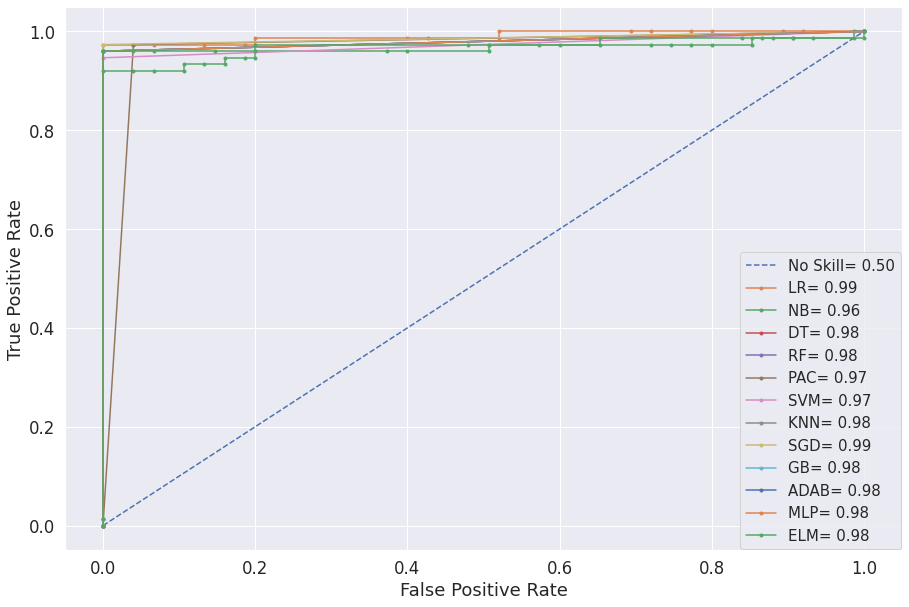

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


"""
LogisticReg
NaivBayes
DTc
Pac
"""
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
nb_probs = NB.predict_proba(X_test)
dtc_probs = DTc.predict_proba(X_test)
rf_probs = clf_rf.predict(X_test)
pac_probs = pac.predict(X_test)
svm_probs = clf_svm.predict(X_test)
knn_probs = clf_knn.predict(X_test)
sgd_probs = clf_sgd.predict(X_test)
gb_probs = clf_gb.predict(X_test)
adaB_probs = clf_adaB.predict(X_test)
xgb_probs = clf_adaB.predict(X_test)
mlp_probs = clf_mlp.predict(X_test)
elm_probs = elm.predict(X_test)
#elm_probs = elm.predict(X_test_drop_corr) #avoiding Feature selection & PCA
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
nb_probs = nb_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
#elm_probs = elm_probs[:, 1]
#mlp_probs = mlp_probs[:, 1]
#rf_probs = rf_probs[:, 1]
#pac_probs = pac_probs[:, 1]
#svm_probs = svm_probs[:, 1]
#knn_probs = knn_probs[:, 1]
#gb_probs = gb_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
pac_auc = roc_auc_score(y_test, pac_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
sgd_auc = roc_auc_score(y_test, sgd_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
adaB_auc = roc_auc_score(y_test, adaB_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
elm_auc = roc_auc_score(y_test, elm_probs)
# summarize scores
print('No Skill: ROC AUC=,%.3f' % (ns_auc))
print('Logistic: ROC AUC=,%.3f' % (lr_auc))
print('NB: ROC AUC=,%.3f' % (nb_auc))
print('DTC: ROC AUC=,%.3f' % (dtc_auc))
print('RF: ROC AUC=,%.3f' % (rf_auc))
print('PAC: ROC AUC=,%.3f' % (pac_auc))
print('SVM: ROC AUC=,%.3f' % (svm_auc))
print('KNN: ROC AUC=,%.3f' % (knn_auc))
print('SGD: ROC AUC=,%.3f' % (sgd_auc))
print('GB: ROC AUC=,%.3f' % (gb_auc))
print('ADAB-Boost: ROC AUC=,%.3f' % (adaB_auc))
print('XGBoost: ROC AUC=,%.3f' % (xgb_auc))
print('MLP: ROC AUC=,%.3f' % (mlp_auc))
print('ELM: ROC AUC=,%.3f' % (elm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pac_fpr, pac_tpr, _ = roc_curve(y_test, pac_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
adaB_fpr, adaB_tpr, _ = roc_curve(y_test, adaB_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
elm_fpr, elm_tpr, _ = roc_curve(y_test, elm_probs)
# plot the roc curve for the model
f = pyplot.figure()
f.set_figwidth(15)
f.set_figheight(10)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill= %.2f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LR= %.2f' % (lr_auc))
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='NB= %.2f' % (nb_auc))
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='DT= %.2f' % (dtc_auc))
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='RF= %.2f' % (rf_auc))
pyplot.plot(pac_fpr, pac_tpr, marker='.', label='PAC= %.2f' % (pac_auc))
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM= %.2f' % (svm_auc))
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN= %.2f' % (knn_auc))
pyplot.plot(sgd_fpr, sgd_tpr, marker='.', label='SGD= %.2f' % (sgd_auc))
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB= %.2f' % (gb_auc))
pyplot.plot(adaB_fpr, adaB_tpr, marker='.', label='ADAB= %.2f' % (adaB_auc))
#pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost= %.2f' % (xgb_auc))
pyplot.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP= %.2f' % (mlp_auc))
pyplot.plot(elm_fpr, elm_tpr, marker='.', label='ELM= %.2f' % (elm_auc))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
#pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})
pyplot.legend(loc='center right', bbox_to_anchor=(1.008, 0.275), prop={'size': 15})
#loc='upper left', bbox_to_anchor=(0, 4), mode="expand", borderaxespad=0.3
# show the plot
pyplot.show()

# CONCATENATE class variables together.

In [ ]:
balanced_df = pd.concat([df[df["class"] == 0], df[df["class"] == 1].sample(n = 253, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)
balanced_df["class"].value_counts()

1    253
0    250
Name: class, dtype: int64

#Feature Importance

In [ ]:
feature_dict = dict(zip(df.columns,list(logreg.coef_[0])))
feature_dict

{'age': 4.289806842888615, 'bp': -0.31748382330245056}

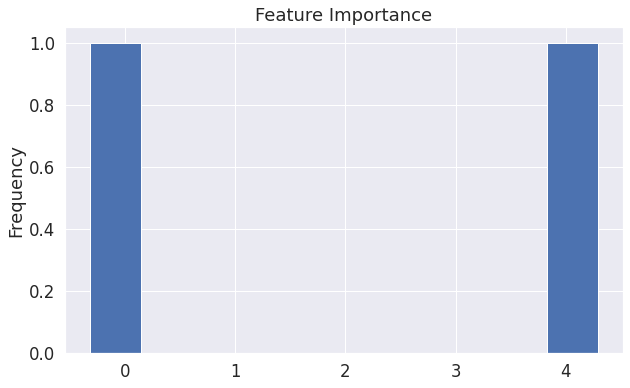

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",legend=False,title="Feature Importance")

#Visualize feature importance – Transpose

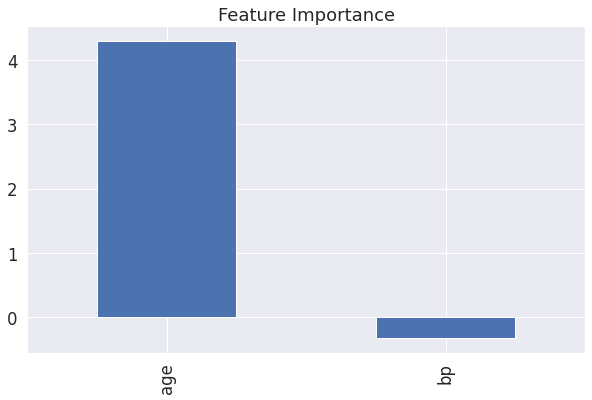

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")